In [7]:
import cv2
import numpy as np
import os
from POS_WANG_MASK import POS_WANG_MASK
from HR_from_bvp import HR_from_bvp
from HR_from_csv import HR_from_csv

In [13]:
from timestamps import timestamps

base_path_video = "Dataset/"

paths = [
    "Q1_1", 
    "Q1_2",
    "Q2_1",
    "Q2_2",
    "Q3_1",
    "Q3_2",
    "Q4_1",
    "Q4_2",
    "Q5_1",
    "Q5_2",
    "Q6_1",
    "Q6_2",
    "Q7_1",
    "Q7_2",
    "Q8_1",
    "Q8_2",
    "Q9_1",
    "Q9_2"
]

patients = [
    "Patient_1"
    #"Patient_2"
]

fs = 60

for patient in patients:

    print(f"----------------------{patient}----------------------")

    for idx, path in enumerate(paths):

        # # Cargar video y convertir a RGB
        video_path = base_path_video + "/" + patient + "/" + path + "/vid_crop.avi"
        cap = cv2.VideoCapture(video_path)
        frames = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            #frame = cv2.resize(frame, (128, 128))  # resize opcional
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        cap.release()

        print(f"Loaded {len(frames)} frames from video {patient} -> {path}.")

        try:
            current_bvp = POS_WANG_MASK(frames, fs)

            path_npy = f"BVPs/{patient}/{path}.npy"
            os.makedirs(os.path.dirname(path_npy), exist_ok=True)
            np.save(path_npy, current_bvp)

            print(f"Saved bvp from {patient} -> {path} in {path_npy}")

        except Exception as e:
            print(f"{path}: Error during POS_WANG_MASK:", e)
    
    print()


----------------------Patient_1----------------------


KeyboardInterrupt: 

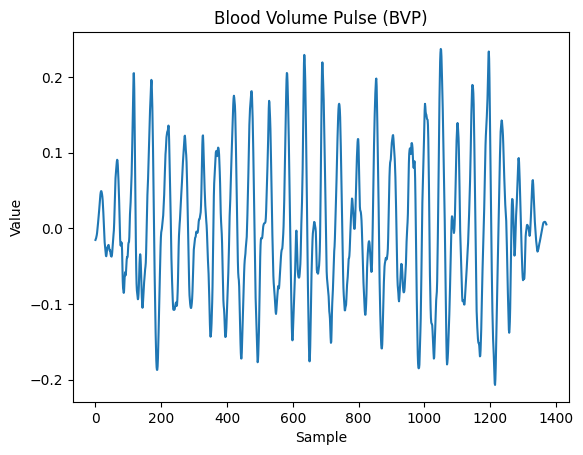

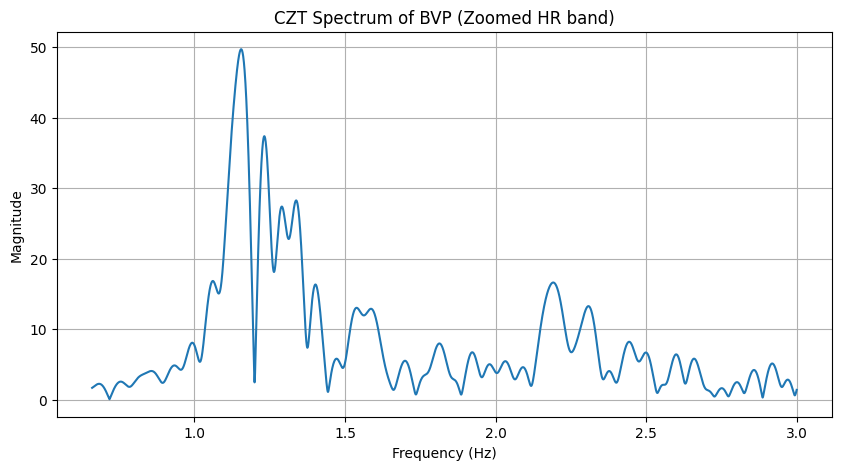

HR estimated by CZT: 69.29142857142857 bpm


In [11]:
rppg_signal = np.load("BVPs/Patient_1/Q1_1.npy")

hr = HR_from_bvp(rppg_signal)

print("HR estimated by CZT:", hr, "bpm")

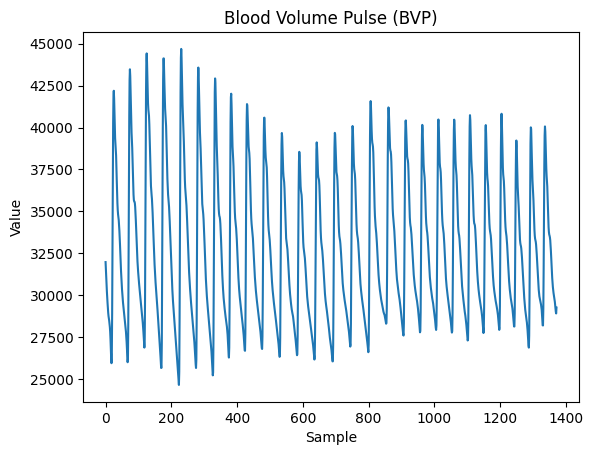

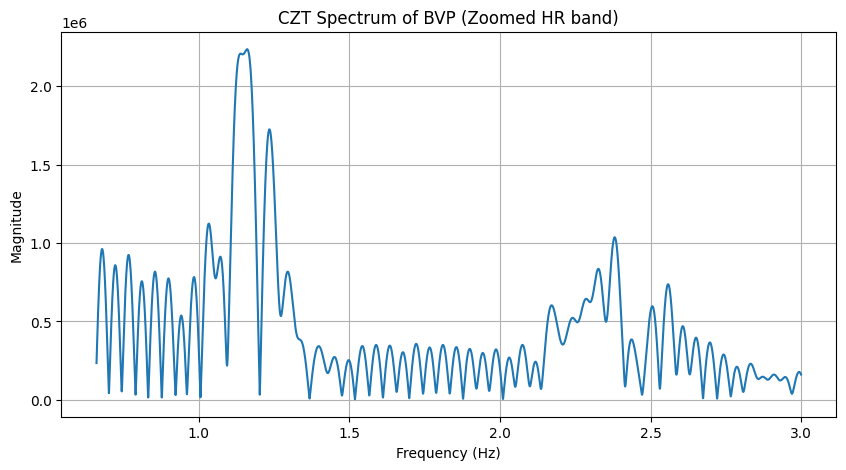

HR estimated by CZT: 69.6 bpm


In [5]:
hr_true = HR_from_csv(base_path_video + "bio.csv")
print("HR estimated by CZT:", hr_true, "bpm")